# Problem set 3 numerical solutions companion

This Jupyter notebook accompanies the problem set solutions. It is based off of `lecture12_getting-started-PS3`

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import root
from scipy.integrate import solve_ivp

# There is a warning that is outputted due to converting numpy arrays 
import warnings
warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning) 

## Questions 1 and 2

In these questions, you are asked to solve a boundary-value problem using a shooting scheme. This combines solve_ivp with a root finder, and was explained during the problem class. 

Once a solution is found, we then use a maxima finder to locate the peak, and then this allows us to study the thickness of the boundary layer as epsilon tends to zero

In [2]:
def myode(z, Y, ep):
    T, Tp = Y
    Tpp = -1/ep*(2*Tp + T)
    return [Tp, Tpp]

def myF(a, ep):
    Y0 = [0, a]
    fwd = lambda z, Y: myode(z, Y, ep)
    sol = solve_ivp(fwd, [0, 1], Y0, dense_output=True)
    
    # Value at the right endpoint
    T1 = sol.y[0,-1]
    F = T1 - 1
    return F

# We create a function to solve and plot the ODE given a value of 'a'. It also returns the solution structure so we can plot it again
def solveODE(a, ep):    
    fwd = lambda z, Y: myode(z, Y, ep)
    sol = solve_ivp(fwd, [0, 1], [0, a], dense_output=True)
    # Re-interpolate and plot
    t = np.linspace(0, 1, 500)
    Y = sol.sol(t)
    plt.plot(t, Y[0])
    plt.grid(True)
    return sol, t, Y

Let's first test the ODE solver at a value of T'(0) = a. You will notice this solution does not match up on the right to T(1) = 1 because its the wrong 'a'

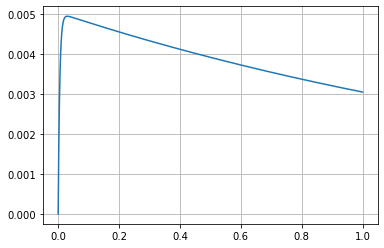

In [3]:
# Let's test the ODE solution
a = 1
ep = 0.01
sol = solveODE(a, ep)

So for each value of epsilon, we wrap the ODE solver into a Newton solver. This converges to the right value of 'a'

The solution converged.
We found that F'(0) = a =  15.165375724740048
Maxima for ep =  0.2  found at (z, y) =  0.3226452905811623 ,  1.3501427227816538


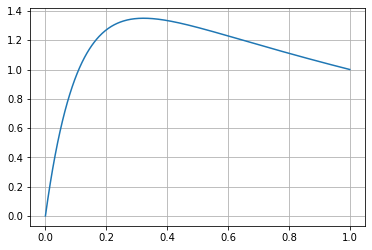

In [7]:
ep = 0.2
fwd = lambda a: myF(a, ep); # Create an auxiliary function to pass the value of epsilon first
sol = root(fwd, 1)
asol = sol.x[0]
print(sol.message)
print("We found that F'(0) = a = ", asol)

# Solve it now with the discovered value
solODE, z, Y = solveODE(asol, ep)

# Find the maxima index
ind = np.argmax(Y[0])
zmax = z[ind]
ymax = Y[0, ind]

# Print and plot the maxima
print("Maxima for ep = ", ep, " found at (z, y) = ", zmax, ", ", ymax)

# plt.plot(zmax, ymax, 'ro')

You can now use the above code to experiment for different values of epsilon. Here are some values, estimated to four digits. You will see that it looks like a line. 

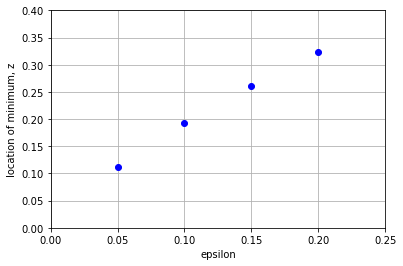

In [29]:
ep = np.array([0.05, 0.1, 0.15, 0.2])
zm = np.array([0.1122, 0.1924, 0.2605, 0.3226])
plt.plot(ep, zm, 'bo');
plt.xlabel('epsilon');
plt.ylabel('location of minimum, z');
plt.xlim([0,0.25])
plt.ylim([0,0.4])
plt.grid(1)